---

# Lib

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [125]:
np.linspace(1, 10, 20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

---

# Read file

In [126]:
df = pd.read_csv("../data/raw/train.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [127]:
df.head()

,brand,model,version,year,segment,comment,label
0,vinfast,vf 6,NaN,2024,suv,VF6 xe cho cá nhân dùng chứ gia đình dùng thì ...,negative
1,vinfast,vf 6,NaN,2024,suv,Xe điện mà ồn hơn xe xăng có j đó sai sai,negative
2,huyndai,accent,NaN,2024,sedan,Form này đẹp ác,positive
3,huyndai,accent,NaN,2024,sedan,Tôi thấy nó thể thao đấy chứ,positive
4,vinfast,vf 6,eco,2025,suv,Hiện tại xe VinFast chạy dịch vụ khá phổ biến....,negative


---

# EDA

In [128]:
print(f"{df.shape[0]} rows")
print(f"{df.shape[1]} columns")

3592 rows
7 columns


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   brand    3592 non-null   object
 1   model    3592 non-null   object
 2   version  2489 non-null   object
 3   year     3592 non-null   int64 
 4   segment  3592 non-null   object
 5   comment  3592 non-null   object
 6   label    3592 non-null   object
dtypes: int64(1), object(6)
memory usage: 196.6+ KB


## Missing values

Sự null này là MNAR (Missing not a random) tức version được thiếu vì:
- video, người đánh giá không đề cập rõ về version cụ thể của xe mà đánh giá chung về model xe đó hoặc các loại xe.
- Không quá khác biệt về thiết kế nột thất hoặc ngoại thất mà có thể là sự khác biệt về động cơ hoặc các tính năng, công nghệ được trang bị.
- Xe chỉ có duy nhất 1 version được bán ra thị trường với tên brand + model

In [130]:
df.isnull().sum()

brand         0
model         0
version    1103
year          0
segment       0
comment       0
label         0
dtype: int64

## Categorical columns

In [131]:
for col in df.columns[:-2]:
    num_unique_values = df[col].nunique()
    print(f"{col}: {num_unique_values} unique values")

brand: 15 unique values
model: 27 unique values
version: 27 unique values
year: 2 unique values
segment: 2 unique values


In [132]:
for col in df.columns[:-2]:
    print(f"{col}: {df[col].unique()}")
    print()

brand: ['vinfast' 'huyndai' 'skoda' 'nissan' 'toyota' 'byd' 'mitsubishi' 'geely'
 'mg' 'honda' 'omoda' 'kia' 'haval' 'hyundai' 'mazda']

model: ['vf 6' 'accent' 'slavia' 'almera' 'vios' 'sealion 6' 'kushaq' 'xforce'
 'coolray' 'zs' 'city' '5' 'c5' 'atto 3' 'corolla cross' 'seltos'
 'attrage' 'yaris cross' 'hr-v' 'jolian' 'seal 5' 'creta' 'cx-3' 'atto 2'
 '2' 'kicks' 'soluto']

version: [nan 'eco' 'style' 'g' 'ultimate' 'flagship' 'ambiton' 'std' '1.5 rs' 'v'
 'cvt' 'máy xăng' 'luxury' 'plus' 'dm-i' 'n line' '1.5 at' 'facelift' 'at'
 'e-powers' '1.5 premium' '1.5 luxury' '1.5 l' '1.5 deluxe' 'e' 'active'
 'hybrid' 'l']

year: [2024 2025]

segment: ['suv' 'sedan']



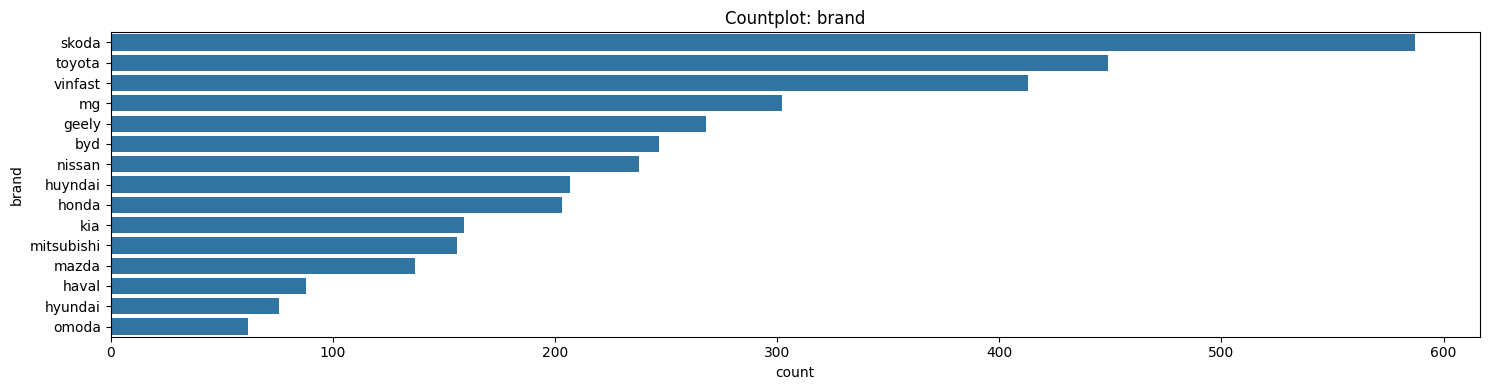

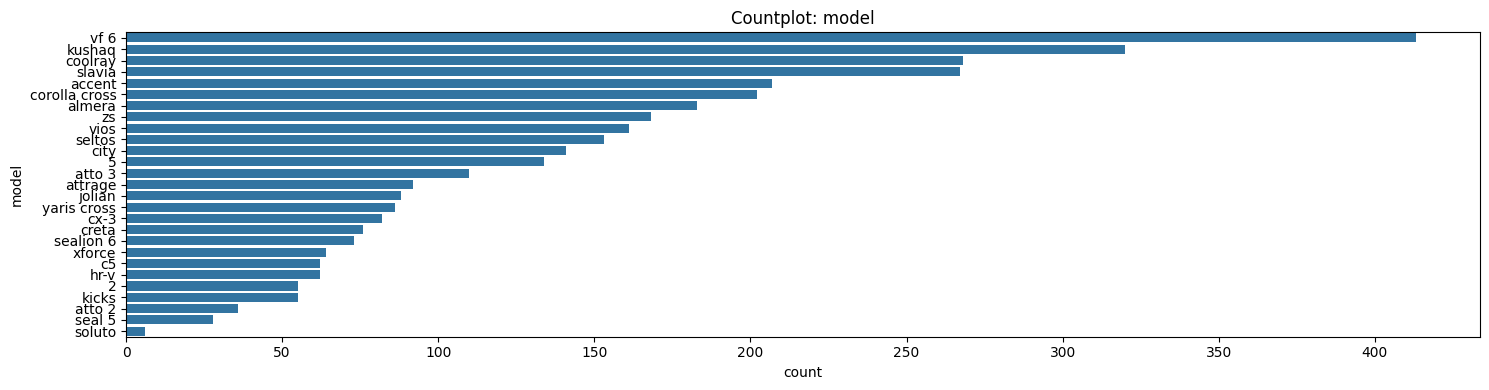

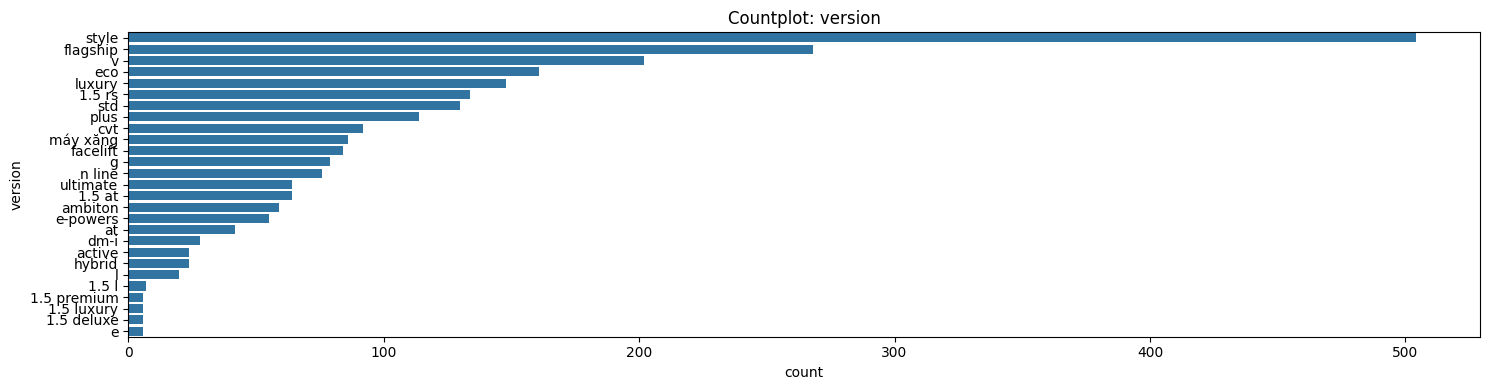

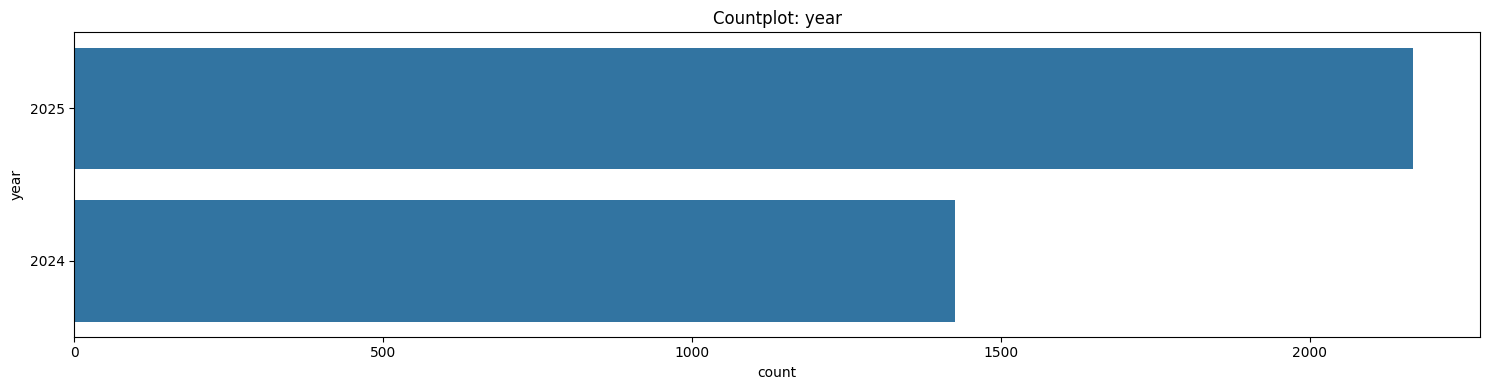

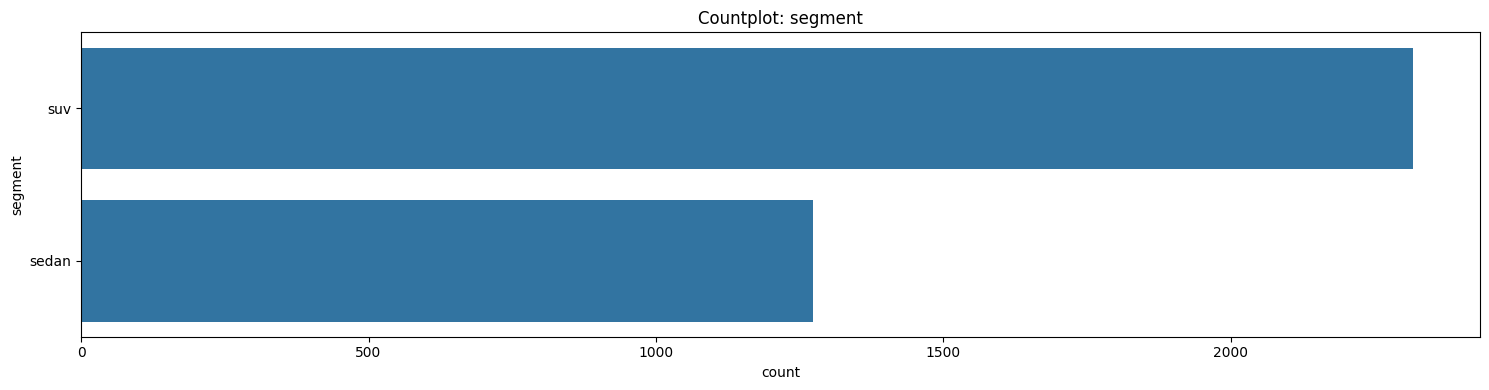

In [133]:
for col in df.columns[:-2]:
    counts = df[col].value_counts()
    plt.figure(figsize=(15, 4))
    sns.countplot(y=col, data=df, order=counts.index)
    plt.title(f"Countplot: {col}")
    plt.tight_layout()
    plt.show()

---

## Labels

In [134]:
df_label = df[["comment", "label"]].copy()

In [135]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  3592 non-null   object
 1   label    3592 non-null   object
dtypes: object(2)
memory usage: 56.3+ KB


In [136]:
df_label.head()

,comment,label
0,VF6 xe cho cá nhân dùng chứ gia đình dùng thì ...,negative
1,Xe điện mà ồn hơn xe xăng có j đó sai sai,negative
2,Form này đẹp ác,positive
3,Tôi thấy nó thể thao đấy chứ,positive
4,Hiện tại xe VinFast chạy dịch vụ khá phổ biến....,negative


In [137]:
label_counts = df[["label"]].value_counts()
label_proportions = df['label'].value_counts(normalize=True) * 100
total_labels = df["label"].nunique()

In [138]:
print(f"Total labels: {total_labels}")

Total labels: 3


In [139]:
print(f"Unique labels: {label_counts.index.tolist()}")

Unique labels: [('positive',), ('negative',), ('neutral',)]


In [140]:
label_counts

label   
positive    1811
negative    1416
neutral      365
Name: count, dtype: int64

In [141]:
label_proportions

label
positive    50.417595
negative    39.420935
neutral     10.161470
Name: proportion, dtype: float64

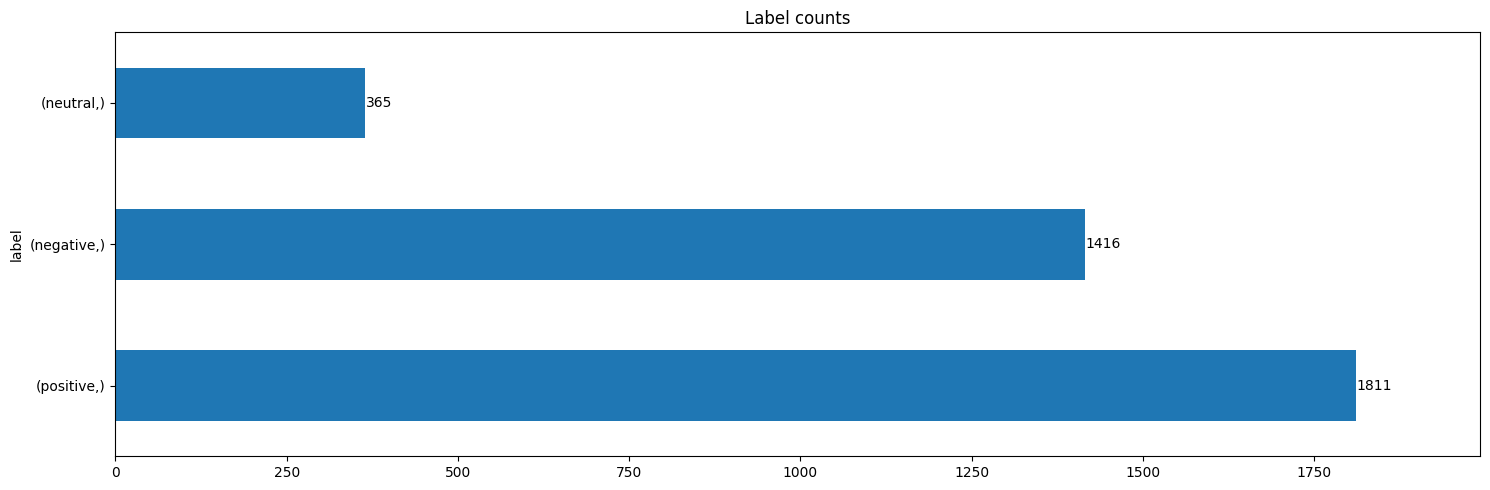

In [142]:
ax = label_counts.plot(kind='barh', figsize=(15,5), title='Label counts')
max_width = int(label_counts.max())
for p in ax.patches:
    value = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    x = p.get_x() + p.get_width() + 0.3
    ax.text(x, y, str(value), va='center', ha='left', fontsize=10)
ax.set_xlim(0, max_width * 1.10) 
plt.tight_layout()
plt.show()

---

## Analysis

In [143]:
df["version"] = df["version"].fillna("")

In [144]:
df["fullname"] = df["brand"] + " " + df["model"] + " " + df["version"]

In [145]:
df.head()

,brand,model,version,year,segment,comment,label,fullname
0,vinfast,vf 6,,2024,suv,VF6 xe cho cá nhân dùng chứ gia đình dùng thì ...,negative,vinfast vf 6
1,vinfast,vf 6,,2024,suv,Xe điện mà ồn hơn xe xăng có j đó sai sai,negative,vinfast vf 6
2,huyndai,accent,,2024,sedan,Form này đẹp ác,positive,huyndai accent
3,huyndai,accent,,2024,sedan,Tôi thấy nó thể thao đấy chứ,positive,huyndai accent
4,vinfast,vf 6,eco,2025,suv,Hiện tại xe VinFast chạy dịch vụ khá phổ biến....,negative,vinfast vf 6 eco


---

#### Brands

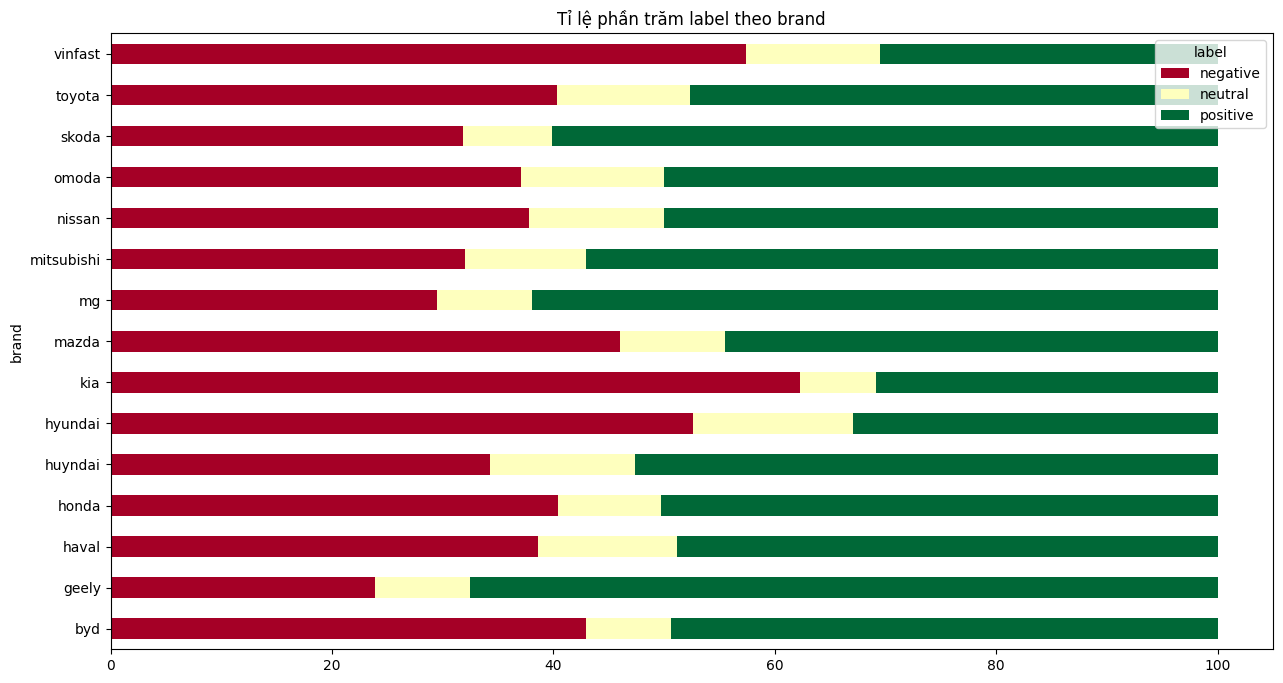

In [170]:
brand_sentiment = df.groupby('brand')['label'].value_counts(normalize=True).unstack() * 100
brand_sentiment.plot(kind='barh', stacked=True, figsize=(15, 8), colormap='RdYlGn')
plt.title('Tỉ lệ phần trăm label theo brand')
plt.show()

---

#### By segment

In [147]:
df.groupby("segment")["label"].value_counts().rename("count").reset_index().pivot(index="segment", columns="label", values="count").fillna(0).astype(int)

label,negative,neutral,positive
segment,,,
sedan,421,129,724
suv,995,236,1087


---

#### By year

In [163]:
df.groupby("year")["label"].value_counts().rename("count").reset_index().pivot(index="year", columns="label", values="count").fillna(0).astype(int)

label,negative,neutral,positive
year,,,
2024,590,155,680
2025,826,210,1131


---

#### Segment + Year

In [154]:
df.groupby(["segment", "year"])["label"].value_counts().rename("count").reset_index().pivot(index=["segment", "year"], columns="label", values="count").fillna(0).astype(int)

label         negative  neutral  positive
segment year                             
sedan   2024       165       65       286
        2025       256       64       438
suv     2024       425       90       394
        2025       570      146       693

---

#### Segment + Fullname

In [157]:
df['model'].nunique()
df.groupby('segment')['fullname'].nunique().reset_index()

,segment,fullname
0,sedan,17
1,suv,26


In [156]:
df.groupby(["segment","fullname"])["label"].value_counts().rename("count").reset_index().pivot(index=["segment","fullname"], columns="label", values="count").fillna(0).astype(int)

label                                negative  neutral  positive
segment fullname                                                
sedan   byd seal 5 dm-i                    11        2        15
        honda city 1.5 l                    4        0         3
        honda city 1.5 rs                  44       12        78
        huyndai accent                     71       27       109
        kia soluto                          3        2         1
        mazda 2                             4        2         7
        mazda 2 at                         15        3        24
        mg 5 luxury                        13        3        34
        mg 5 std                           24        8        52
        mitsubishi attrage cvt             16        6        70
        nissan almera                      57       23       103
        skoda slavia active                 9        2        13
        skoda slavia ambiton               18        4        37
        skoda slavia style                 56       13       115
        toyota vios                        53       17        48
        toyota vios e                       4        0         2
        toyota vios g                      19        5        13
suv     byd atto 2                         19        1        16
        byd atto 3                         37       12        61
        byd sealion 6                      39        4        30
        geely coolray flagship             64       23       181
        haval jolian                       34       11        43
        honda hr-v g                       23        5        14
        honda hr-v l                       11        2         7
        hyundai creta n line               40       11        25
        kia seltos                         32        4        33
        kia seltos facelift                64        5        15
        mazda cx-3 1.5 at                  36        5        23
        mazda cx-3 1.5 deluxe               3        0         3
        mazda cx-3 1.5 luxury               2        2         2
        mazda cx-3 1.5 premium              3        1         2
        mg zs hybrid                       16        2         6
        mg zs luxury                       23        8        67
        mg zs std                          13        5        28
        mitsubishi xforce ultimate         34       11        19
        nissan kicks e-powers              33        6        16
        omoda c5                           23        8        31
        skoda kushaq style                104       28       188
        toyota corolla cross v             81       25        96
        toyota yaris cross máy xăng        24        7        55
        vinfast vf 6                       99        6        33
        vinfast vf 6 eco                   86       29        46
        vinfast vf 6 plus                  52       15        47

---

#### Comment length

In [162]:
df['comment_length'] = df['comment'].str.len()
df.groupby(['segment','label'])['comment_length'].mean()

segment  label   
sedan    negative    101.123515
         neutral     116.844961
         positive     91.279006
suv      negative    111.396985
         neutral     157.966102
         positive    115.971481
Name: comment_length, dtype: float64